# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [2]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [4]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

In [5]:
ames_subset.corr()['SalePrice']

LotArea      0.263843
1stFlrSF     0.605852
GrLivArea    0.708624
SalePrice    1.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

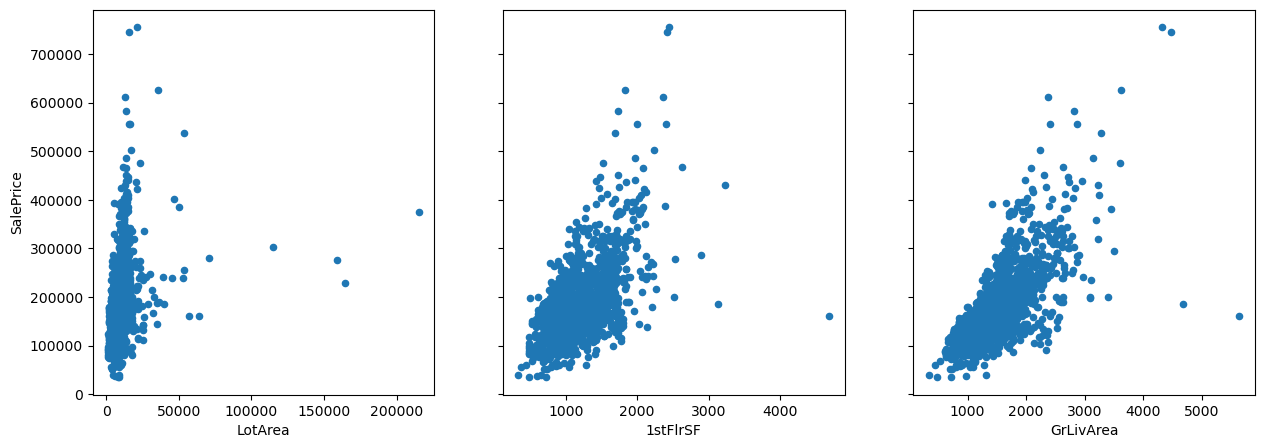

In [6]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True)
ames_subset.plot(kind='scatter', x='LotArea', y='SalePrice', ax=ax[0])
ames_subset.plot(kind='scatter', x='1stFlrSF', y='SalePrice',ax=ax[1])
ames_subset.plot(kind='scatter', x='GrLivArea', y='SalePrice', ax=ax[2])

In [7]:
# Your written answer here - do these seem like good candidates for linear regression?
""" 
The scatter plot for LotArea vs. SalePrice does not seem like a good candidate for linear regression. 
The data points are spread out and do not show a clear linear relationship. 
It also has the lowest correlation coefficient of the three variables.
The scatter plot for 1stFlrSF vs. SalePrice seems like a good candidate for linear regression. 
The data points show a clear linear relationship. 
The scatter plot for GrLivArea vs. SalePrice also seems like a good candidate for linear regression. 
The data points show a clear linear relationship.
"""

' \nThe scatter plot for LotArea vs. SalePrice does not seem like a good candidate for linear regression. \nThe data points are spread out and do not show a clear linear relationship. \nIt also has the lowest correlation coefficient of the three variables.\nThe scatter plot for 1stFlrSF vs. SalePrice seems like a good candidate for linear regression. \nThe data points show a clear linear relationship. \nThe scatter plot for GrLivArea vs. SalePrice also seems like a good candidate for linear regression. \nThe data points show a clear linear relationship.\n'

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [8]:
# Your code here - define y and baseline X
y = ames_subset['SalePrice']
X = ames[['1stFlrSF']]

In [9]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm 
baseline_model = sm.OLS(y, sm.add_constant(X)).fit()
print(baseline_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     845.5
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          5.39e-147
Time:                        15:45:29   Log-Likelihood:                -18210.
No. Observations:                1460   AIC:                         3.642e+04
Df Residuals:                    1458   BIC:                         3.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.617e+04   5245.728      6.896      0.0

In [10]:
# Your written answer here - interpret model results
""" 
From the Linear Regression above we can conclude that the regression line is:
    SalePrice = 3.617e+04 + 124.5006 1srFlrSF
1. The model is statistically significant with an F-statistic of 845.5 and its p-value well below 0.05 as the level of 
significance. 
2. The model accoints for about 37% of the variance in SalePrice. This is a very low value hence this value may not 
be ideal for use if variiance is a consideration. 
3. The model co-efficients are both statistically significant with p-values of well below 0.05.
4. If a house had no first floor we would expect the SalePrice to be $3.617 USD
5. For each square footage of the first floor, an expected increase of about $124 is expected. 
"""

' \nFrom the Linear Regression above we can conclude that the regression line is:\n    SalePrice = 3.617e+04 + 124.5006 1srFlrSF\n1. The model is statistically significant with an F-statistic of 845.5 and its p-value well below 0.05 as the level of \nsignificance. \n2. The model accoints for about 37% of the variance in SalePrice. This is a very low value hence this value may not \nbe ideal for use if variiance is a consideration. \n3. The model co-efficients are both statistically significant with p-values of well below 0.05.\n4. If a house had no first floor we would expect the SalePrice to be $3.617 USD\n5. For each square footage of the first floor, an expected increase of about $124 is expected. \n'

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [11]:
# Your code here - define X
X_baseline = ames[['LotArea','1stFlrSF', 'GrLivArea']]

In [12]:
# Your code here - fit model and display results
new_model = sm.OLS(y, sm.add_constant(X_baseline)).fit()
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.57e-262
Time:                        15:45:30   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [13]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?
"""
From the Linear Regression above we can conclude that the regression line is:
    SalePrice = -2.292e+04 + 1.879e+01 LotArea + 1.113e+02 1stFlrSF + 5.454e+01 GrLivArea
1. This model is statistically significant with a p-value well below the significance level of 0.05. 
2. The model accounts for 56.7% of the variance in the SalePrice which makes it better than the previous model.
3. The LotArea value is statistically insignificant as it has a p-value greater then 0.05, however the other 
two variables are statistically significant.
4. If a house has no LotArea, 1stFlrSF or GrLivArea, the SalePrice would be -2.292 USD which is essentially
0. This is not a realistic value.
5. For each square footage of the first floor, an expected increase of about $111 in sale is expected.For 
each square footage of the Ground Living Area, an expected increase of about $54 in sale is expected.For each
square footage of the Lot Area, an expected increase of about $18 in sale is expected.

This model seems better than the previous one as it accounts for more variance in the SalePrice. Hoeever, the
LotArea variable is statistically insignificant and should be removed from the model. 
"""

'\nFrom the Linear Regression above we can conclude that the regression line is:\n    SalePrice = -2.292e+04 + 1.879e+01 LotArea + 1.113e+02 1stFlrSF + 5.454e+01 GrLivArea\n1. This model is statistically significant with a p-value well below the significance level of 0.05. \n2. The model accounts for 56.7% of the variance in the SalePrice which makes it better than the previous model.\n3. The LotArea value is statistically insignificant as it has a p-value greater then 0.05, however the other \ntwo variables are statistically significant.\n4. If a house has no LotArea, 1stFlrSF or GrLivArea, the SalePrice would be -2.292 USD which is essentially\n0. This is not a realistic value.\n5. For each square footage of the first floor, an expected increase of about $111 in sale is expected.For \neach square footage of the Ground Living Area, an expected increase of about $54 in sale is expected.For each\nsquare footage of the Lot Area, an expected increase of about $18 in sale is expected.\n\nT

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

c:\Users\CINDY\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\CINDY\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\CINDY\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

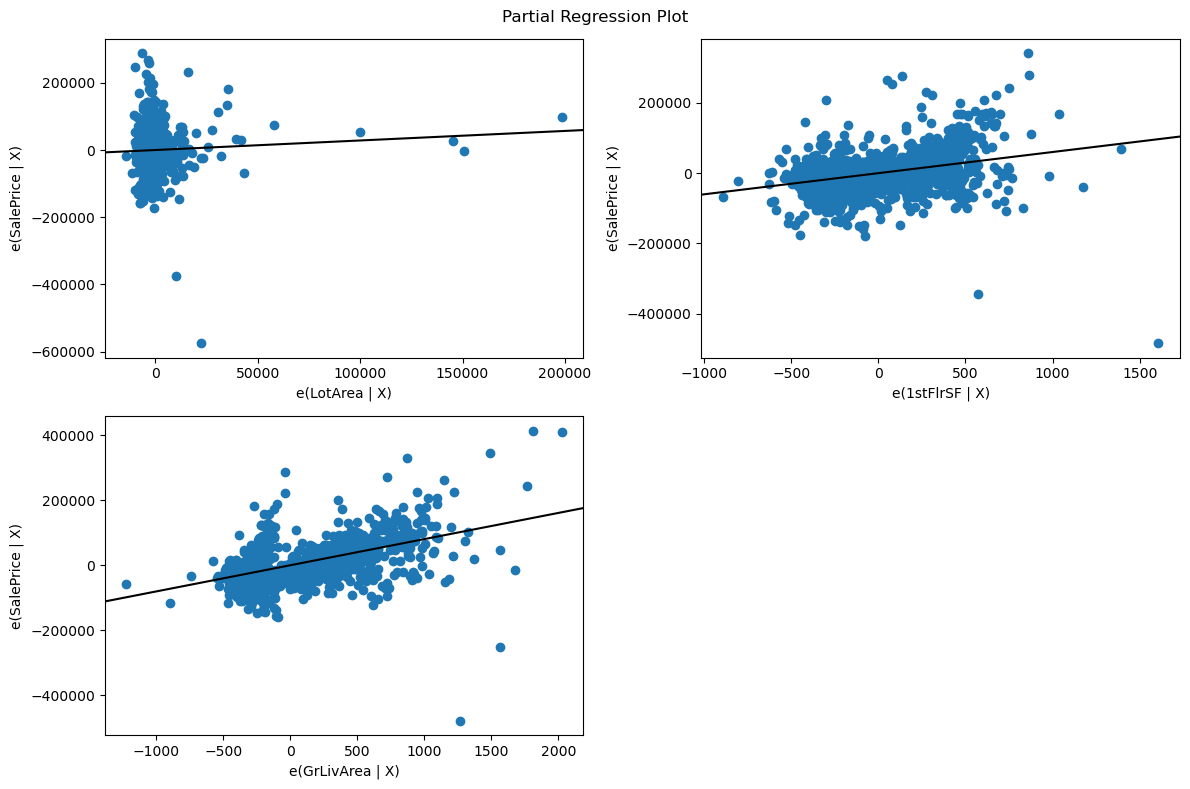

In [14]:
# Your code here - create partial regression plots for each predictor
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(new_model, exog_idx=['LotArea','1stFlrSF', 'GrLivArea'], fig=fig)
plt.tight_layout()
plt.show()

In [15]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?
""" 
For the first plot, we see that the partial regression plot for LotArea vs. SalePrice shows a flat line, which 
indicates that the relationship between LotArea and SalePrice is not linear. This is consistent with what we saw
in the scatter plot and the low correlation coefficient.
For the second plot we see that the partial regression plot for 1stFlrSF vs. SalePrice shows a clear linear
with a positive slope. This is consistent with what we saw in the scatter plot and the high correlation coefficient.
For the third plot we see that the partial regression plot for GrLivArea vs. SalePrice shows a clear linear
with a positive slope. This is consistent with what we saw in the scatter plot and the high correlation coefficient.
"""

' \nFor the first plot, we see that the partial regression plot for LotArea vs. SalePrice shows a flat line, which \nindicates that the relationship between LotArea and SalePrice is not linear. This is consistent with what we saw\nin the scatter plot and the low correlation coefficient.\nFor the second plot we see that the partial regression plot for 1stFlrSF vs. SalePrice shows a clear linear\nwith a positive slope. This is consistent with what we saw in the scatter plot and the high correlation coefficient.\nFor the third plot we see that the partial regression plot for GrLivArea vs. SalePrice shows a clear linear\nwith a positive slope. This is consistent with what we saw in the scatter plot and the high correlation coefficient.\n'

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [16]:
# Your code here - import linear regression from scikit-learn and create and fit model
X_baseline = ames[['LotArea','1stFlrSF', 'GrLivArea']]
y = ames['SalePrice']
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X_baseline, y)


LinearRegression()

In [17]:
# Your code here - compare R-Squared
print(f"""
Statsmodels R-squared: {new_model.rsquared}
Scikit-learn R-squared: {sklearn_model.score(X_baseline, y)}
""")


Statsmodels R-squared: 0.5649801771384368
Scikit-learn R-squared: 0.5649801771384368



In [18]:
# Your code here - compare intercept and coefficients
print(f"""
Statsmodels Intercepts {new_model.params[0]}
Scikit-learn Intercepts {sklearn_model.intercept_}

Statsmodels Coefficients {new_model.params[1:].values}
Scikit-learn Coefficients {sklearn_model.coef_}
""")


Statsmodels Intercepts -14313.40885749438
Scikit-learn Intercepts -14313.408857494564

Statsmodels Coefficients [ 0.28413359 60.28664625 80.60605834]
Scikit-learn Coefficients [ 0.28413359 60.28664625 80.60605834]



C:\Users\CINDY\AppData\Local\Temp\ipykernel_21776\2634095283.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Statsmodels Intercepts {new_model.params[0]}


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.